<a href="https://colab.research.google.com/github/DSamodra/playGround/blob/master/Detect_Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Mining**
Dimas Samodra / DS0107

Make model machine learning to predict hate speech and non hate speech from data text, in this task i use svm algorithm. Let's Start

In [9]:
#import library
! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# Create Sentiment Analysis Function
analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [10]:
#import the library
import pandas as pd 
 
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.naive_bayes import GaussianNB # to bulid classifier model
from sklearn.preprocessing import LabelEncoder # to convert classes to number 
from sklearn.metrics import accuracy_score # to calculate accuracy

## **Import data**

In [11]:
#insert data
from google.colab import files
uploaded = files.upload()
 
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['data.txt']), error_bad_lines=False, encoding='latin1', sep='\t')
data_raw

Saving data.txt to data (1).txt


,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [12]:
#show the null data
data_raw.isnull().sum()

Label    0
Tweet    0
dtype: int64

In [13]:
#count setiap tipe
data_raw.Label.value_counts()

Non_HS    453
HS        260
Name: Label, dtype: int64

## **Preprocess Data - Data Cleaning**

In [14]:
#Membuat fungsi Text Cleaning
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df
    
data_clean = clean_text(data_raw, 'Tweet', 'Tweet')
data_clean.head()

,Label,Tweet
0,Non_HS,fadli zon minta mendagri segera menonaktifka...
1,Non_HS,mereka terus melukai aksi dalam rangka memen...
2,Non_HS,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,waspada ktp palsukawal pilkada tcooooerqvsm


In [15]:
#import nltk corpus stopword
import nltk.corpus
nltk.download('stopwords')

#clean stopword in text
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')

data_raw['Tweet'] = data_raw['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_raw.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Label,Tweet
0,Non_HS,fadli zon mendagri menonaktifkan ahok gubernur...
1,Non_HS,melukai aksi rangka memenjarakan ahok ahok gag...
2,Non_HS,sylvi gurbernur kekerasan perempuan buktinya f...
3,Non_HS,ahmad dhani puas debat pilkada jalan bekasi te...
4,Non_HS,waspada ktp palsukawal pilkada tcooooerqvsm


In [16]:
#import punkt
import nltk 
nltk.download('punkt')

#tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
data_raw['Tweet'] = data_raw['Tweet'].apply(lambda x: word_tokenize(x))
data_raw.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Label,Tweet
0,Non_HS,"[fadli, zon, mendagri, menonaktifkan, ahok, gu..."
1,Non_HS,"[melukai, aksi, rangka, memenjarakan, ahok, ah..."
2,Non_HS,"[sylvi, gurbernur, kekerasan, perempuan, bukti..."
3,Non_HS,"[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,Non_HS,"[waspada, ktp, palsukawal, pilkada, tcooooerqvsm]"


In [17]:
#install sastrawi
!pip install sastrawi
import re

#stemming word
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize

def word_stemmer(text):
    stem_text = [StemmerFactory().create_stemmer().stem(i) for i in text]
    return stem_text
    
data_raw['Tweet'] = data_clean['Tweet'].apply(lambda x: word_stemmer(x))
data_raw.head()

     |████████████████████████████████| 215kB 5.3MB/s 


,Label,Tweet
0,Non_HS,"[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,Non_HS,"[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,Non_HS,"[sylvi, gurbernur, keras, perempuan, bukti, fo..."
3,Non_HS,"[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,Non_HS,"[waspada, ktp, palsukawal, pilkada, tcooooerqvsm]"


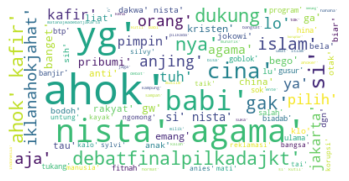

In [19]:
#word cloud
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#create word cloud
cloud = data_raw.Tweet[data_raw['Label']=='HS'].astype('string')
cloud.head()
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_text(' '.join(cloud))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Machine Learning**
predict hate speech and non hate scpeech data using svm

In [20]:
#split data training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_raw['Tweet'], data_raw['Label'], shuffle = True, test_size = 0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(499,)
(214,)
(499,)
(214,)


In [24]:
#import svm, tfidfvectorizer, gridsearch, metrics, cross_validation
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#tfidfvectorize data
pipeline_svm = make_pipeline(TfidfVectorizer(lowercase=False, preprocessor=' '.join), SVC(random_state=1, probability=True))
# grid searh to choose the best (combination of) hyperparameters
parameter = [{'svc__C':[0.1,1], 'svc__kernel':['linear']}]
#grid search
grid_svm = GridSearchCV(estimator=pipeline_svm, param_grid=parameter, scoring='accuracy',cv=2)
# cross validation 
grid_svm_scores = cross_val_score(grid_svm, X=x_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)
# search gs best estimator
grid_svm.fit(x_train, y_train)

#predict model
y_svm = grid_svm.predict(x_test)

#search accuracy
acuracy = metrics.accuracy_score(y_test, y_svm)
f1 = metrics.f1_score(y_test, y_svm, pos_label='HS')

#print accuracy
print('Accuracy for SVM : ', acuracy)
print('Fi for SVM : ', acuracy)

Accuracy for SVM :  0.8691588785046729
Fi for SVM :  0.8691588785046729


# **Kesimpulan**

Model Machine learning yang dibuat memiliki akurasi 0,86 dan F1 0,86 untuk memprediksi hatespeech dan non hate speech. berdasarkan data HS 260 dan Non HS 453.